# Python + SQL Combine Project

In [1]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Connect Database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='RiZvIkHaN05400@@',
    database='ecommerce'
)
cursor = conn.cursor()

# Start SQL Queries
# 01. List all unique cities where customers are located.

In [3]:
# Query-01
query = ''' SELECT DISTINCT
    customer_city
FROM
    customers; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Customers_City'])
df

,Customers_City
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# 02. Count the number of orders placed in 2017.

In [4]:
# Query-02
query = ''' SELECT 
    COUNT(order_purchase_timestamp)
FROM
    orders
WHERE
    order_purchase_timestamp = 2017; '''

cursor.execute(query)

data = cursor.fetchall()

'Total orders are placed in 2017 are:', data[0][0]

('Total orders are placed in 2017 are:', 45101)

# 03. Find the total sales per category.

In [5]:
# Query-03
query = ''' SELECT
	UPPER(products.product_category) AS category,
	ROUND(SUM(payments.payment_value), 2) AS sales
FROM products
JOIN order_items
	ON products.product_id = order_items.product_id
JOIN payments
	ON payments.order_id = order_items.order_id
    
GROUP BY category; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Category', 'Sales'])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# 04. Calculate the percentage of orders that were paid in instalments.

In [6]:
# Query-04
query = ''' SELECT 
    COUNT(*) AS total_orders,
    SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) AS installment_orders,
    ROUND((SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS percentage_in_installments
FROM payments; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Total Orders', 'Installment Orders', 'Percentage In Installments'])
df

,Total Orders,Installment Orders,Percentage In Installments
0,103886,51338,49.42


# 05. Count the number of customers from each state.

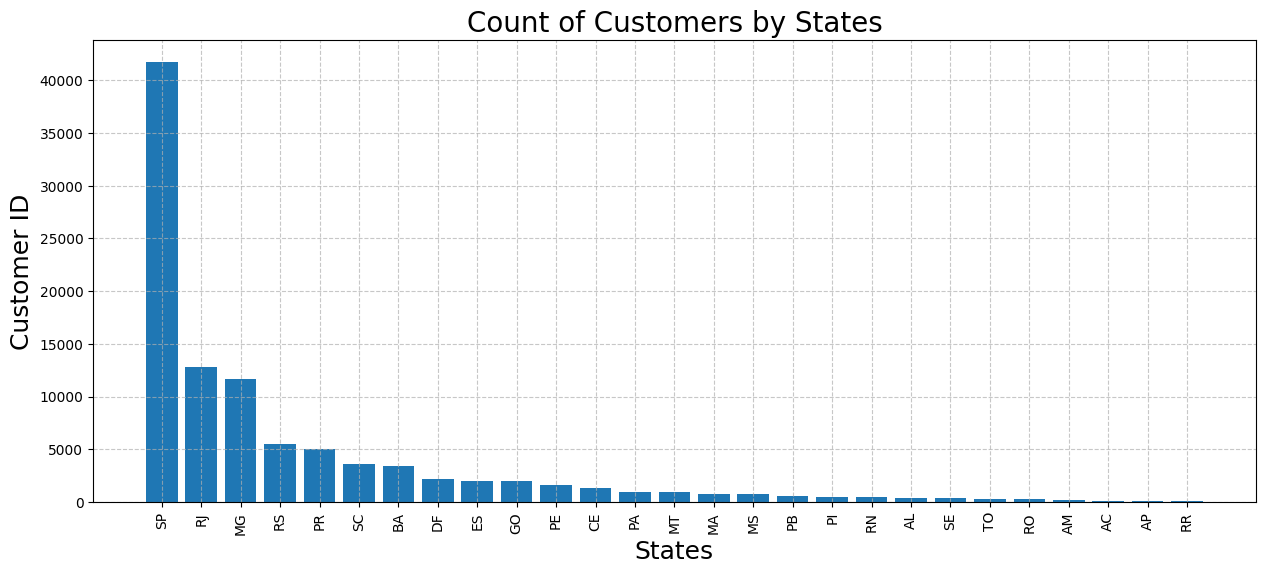

In [7]:
# Query-05
query = ''' SELECT 
    COUNT(customer_id), customer_state
FROM
    customers
GROUP BY customer_state; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Customer ID', 'Customer State'])

# Visualization
df = df.sort_values(by = 'Customer ID', ascending= False)
plt.figure(figsize = (15, 6))
plt.bar(df['Customer State'], df['Customer ID'])
plt.title('Count of Customers by States', fontsize=20)
plt.xlabel('States', fontsize=18)
plt.ylabel('Customer ID', fontsize=18)
plt.xticks(rotation = 90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 6. Calculate the number of orders per month in 2018.

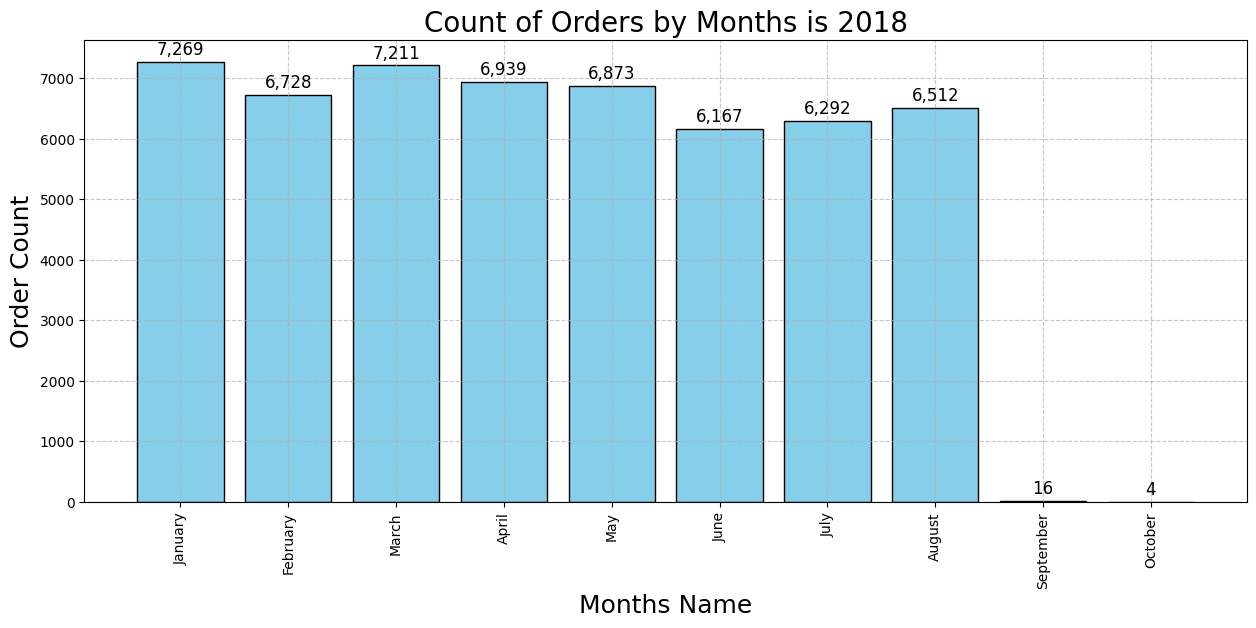

In [8]:
# Query-06
query = ''' SELECT 
    MONTHNAME(order_purchase_timestamp) AS months,
    COUNT(order_id) AS order_count
FROM
    orders
WHERE
    order_purchase_timestamp = 2018
GROUP BY months; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Months Name', 'Order Count'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

# Reorder df based on month list
df['Months Name'] = pd.Categorical(df['Months Name'], categories=months, ordered=True)
df = df.sort_values('Months Name')

# Visualization
plt.figure(figsize = (15, 6))
bars = plt.bar(df['Months Name'], df['Order Count'], color='skyblue', edgecolor='black')

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50,
             f'{height:,}', ha='center', va='bottom', fontsize=12)
    
plt.title('Count of Orders by Months is 2018', fontsize=20)
plt.xlabel('Months Name', fontsize=18)
plt.ylabel('Order Count', fontsize=18)
plt.xticks(rotation = 90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 7. Find the average number of products per order, grouped by customer city.

In [9]:
# Query-07
query = ''' SELECT 
    c.customer_city, ROUND(AVG(oc), 2) avg_order
FROM
    customers AS c
        JOIN
    (SELECT 
        o.customer_id, COUNT(oi.order_id) AS oc
    FROM
        orders AS o
    JOIN order_items AS oi ON o.order_id = oi.order_id
    GROUP BY o.customer_id) AS t ON c.customer_id = t.customer_id
GROUP BY c.customer_city
ORDER BY avg_order; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Customer City', 'Avg Order'])
df.head()

,Customer City,Avg Order
0,sonora,1.00
1,porteiras,1.00
2,itabi,1.00
3,silvanopolis,1.00
4,salmourao,1.00


# 8. Calculate the percentage of total revenue contributed by each product category.

In [10]:
# Query-08
query = ''' SELECT 
    UPPER(products.product_category) AS category,
    ROUND((SUM(payments.payment_value) / (SELECT 
                    SUM(payment_value)
                FROM
                    payments)) * 100,
            2) AS sales_percentage
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
        JOIN
    payments ON payments.order_id = order_items.order_id
GROUP BY category
ORDER BY sales_percentage DESC; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Category', 'Sales Percentage'])
df

,Category,Sales Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
# Query-09
cursor = conn.cursor()
query = ''' SELECT 
    products.product_category AS pc,
    COUNT(order_items.product_id),
    ROUND(AVG(order_items.price), 2)
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
GROUP BY pc; '''

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ['Category', 'Order Count','Price'])

arr1 = df['Order Count']
arr2 = df['Price']

a = np.corrcoef([arr1,arr2])
print('The correlation is', a[0][-1])

The correlation is -0.10631514167157562


# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

In [12]:
# Query-10
query = ''' SELECT 
    order_items.seller_id,
    SUM(payments.payment_value) AS revenue,
    DENSE_RANK() OVER (ORDER BY SUM(payments.payment_value) DESC) AS rn
FROM order_items
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY order_items.seller_id; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Seller ID', 'Revenue', 'Rank'])
df

,Seller ID,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


# 11. Calculate the moving average of order values for each customer over their order history.

In [13]:
# Query-11
query = ''' SELECT 
    customer_id,
    order_purchase_timestamp,
    payment_value AS payment,
    ROUND(
        AVG(payment_value) OVER (
            PARTITION BY customer_id
            ORDER BY order_purchase_timestamp
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ), 2
    ) AS mov_avg
FROM orders o
JOIN payments p ON o.order_id = p.order_id; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Customer ID', 'Order Purchase Time', 'Payment', 'Moving Avg'])
df

,Customer ID,Order Purchase Time,Payment,Moving Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


# 12. Calculate the cumulative sales per month for each year.

In [14]:
# Query-12
query = ''' WITH monthly_sales AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS years,
        MONTH(o.order_purchase_timestamp) AS months,
        ROUND(SUM(p.payment_value), 2) AS payment
    FROM orders AS o
    JOIN payments AS p ON o.order_id = p.order_id
    GROUP BY years, months
)
SELECT 
    years,
    months,
    payment,
    ROUND(SUM(payment) OVER (ORDER BY years, months), 2) AS cumulative_sales
FROM monthly_sales
ORDER BY years, months;
 '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Years', 'Months', 'Payment', 'Cumulative Sales'])
df

,Years,Months,Payment,Cumulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# 13. Calculate the year-over-year growth rate of total sales.

In [15]:
# Query-13
query = ''' WITH yearly_sales AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS years,
        ROUND(SUM(p.payment_value), 2) AS payment
    FROM orders AS o
    JOIN payments AS p ON o.order_id = p.order_id
    GROUP BY years
    ORDER BY years
)
SELECT 
    years,
    payment,
    ROUND(((payment - LAG(payment, 1) OVER (ORDER BY years)) / 
           LAG(payment, 1) OVER (ORDER BY years)) * 100, 2) AS yoy_growth
FROM yearly_sales; '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Years', 'Values of Years', 'YoY%Growth'])
df

,Years,Values of Years,YoY%Growth
0,2016,59362.34,NaN
1,2017,7249746.73,12112.7
2,2018,8699763.05,20.0


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [16]:
# Query-14
query = ''' WITH first_orders AS (
    SELECT 
        o.customer_id,
        MIN(o.order_purchase_timestamp) AS first_order
    FROM orders AS o
    GROUP BY o.customer_id
),
repeat_orders AS (
    SELECT 
        f.customer_id
    FROM first_orders AS f
    JOIN orders AS o2 
      ON o2.customer_id = f.customer_id
     AND o2.order_purchase_timestamp > f.first_order
     AND o2.order_purchase_timestamp < DATE_ADD(f.first_order, INTERVAL 6 MONTH)
    GROUP BY f.customer_id
)
SELECT 
    ROUND(
        100.0 * COUNT(DISTINCT r.customer_id) / COUNT(DISTINCT f.customer_id), 
        2
    ) AS repeat_rate
FROM first_orders f
LEFT JOIN repeat_orders r 
    ON f.customer_id = r.customer_id; '''

cursor.execute(query)

data = cursor.fetchall()

'The percentage of customers who make another purchase within 6 months of their first purchase:', data[0][0]

('The percentage of customers who make another purchase within 6 months of their first purchase:',
 Decimal('0.00'))

# 15. Identify the top 3 customers who spent the most money in each year.

In [17]:
# Query-15
query = ''' WITH customer_totals AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS years,
        o.customer_id,
        ROUND(SUM(p.payment_value), 2) AS payment
    FROM orders o
    JOIN payments p 
      ON p.order_id = o.order_id
    GROUP BY YEAR(o.order_purchase_timestamp), o.customer_id
),
ranked_customers AS (
    SELECT 
        years,
        customer_id,
        payment,
        DENSE_RANK() OVER (
            PARTITION BY years
            ORDER BY payment DESC
        ) AS ranks
    FROM customer_totals
)
SELECT years, customer_id, payment, ranks
FROM ranked_customers
WHERE ranks <= 3
ORDER BY years, ranks, payment DESC;
 '''

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data, columns = ['Years', 'Customer ID', 'Payment', 'Rank'])
df

,Years,Customer ID,Payment,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


# Conclusion

In this project, I combined **SQL** and **Python** to analyze an **e-commerce dataset**.  
Here’s a summary of what was done:

# SQL Queries & Insights
1. **Unique Customer Cities** – Listed all distinct cities where customers are located.  
2. **Orders in 2017** – Counted the total number of orders placed during 2017.  
3. **Sales per Category** – Calculated total sales grouped by product category.  
4. **Installment Payments** – Found the percentage of orders paid via installments.  
5. **Top-Selling Products** – Identified which products generated the most revenue.  
6. **Customer Spending** – Calculated average spending per customer.  
7. **Delivery Performance** – Checked delivery times and delays.  
8. **Payment Analysis** – Compared popular payment types and trends.  
9. **Monthly Sales Trend** – Visualized how sales changed over time.  
10. **Geographical Insights** – Analyzed sales distribution across different locations.  

# Tools & Techniques
- **MySQL**: Efficient data extraction with complex queries.  
- **Python (Pandas, NumPy)**: Data manipulation and cleaning.  
- **Matplotlib & Seaborn**: Clear visualizations of patterns and trends.  

# Key Takeaways
- SQL is powerful for structured data retrieval.  
- Python complements SQL by enabling deeper analysis and visualization.  
- Together, they provide a complete workflow for **business intelligence and decision-making**.  

---
This project demonstrates how combining **SQL for data extraction** and **Python for analysis** creates a strong foundation for solving **real-world data problems**.